In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("../Donnees/cleaned_data.csv")


<Axes: ylabel='Frequency'>

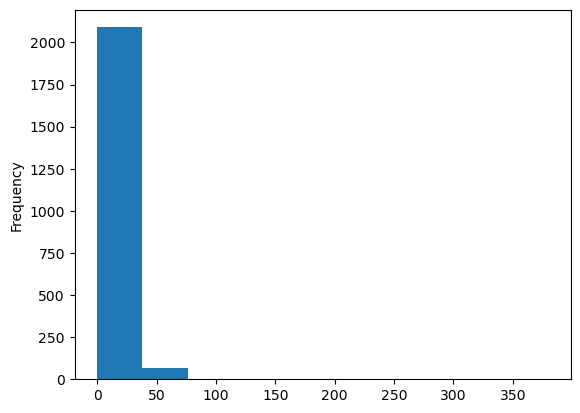

In [2]:
df["price"].plot.hist()

<Axes: >

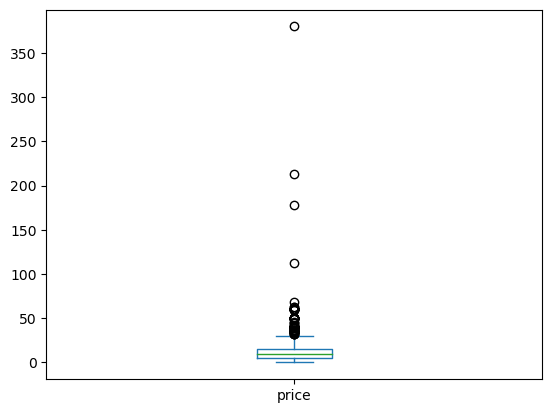

In [3]:
df["price"].plot.box()

In [8]:
number_columns = ["rating", "retirement", "time", "price", "review_count", "rating_value", "twenty_four_hours", "all_time"]
dfn = df[number_columns]

In [9]:
from sklearn.ensemble import IsolationForest

forest = IsolationForest()
outliers = forest.fit_predict(dfn)



In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


dfn = dfn.drop(index=np.where(outliers==-1)[0])
scaler = StandardScaler()  # Standardize numerical variables
dfn = pd.DataFrame(scaler.fit_transform(dfn), columns=number_columns)


NameError: name 'dfn' is not defined

In [42]:
sns.pairplot(dfn)
plt.savefig("pairplot.png")

c:\Users\rapha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rapha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rapha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\rapha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

: 

<Axes: >

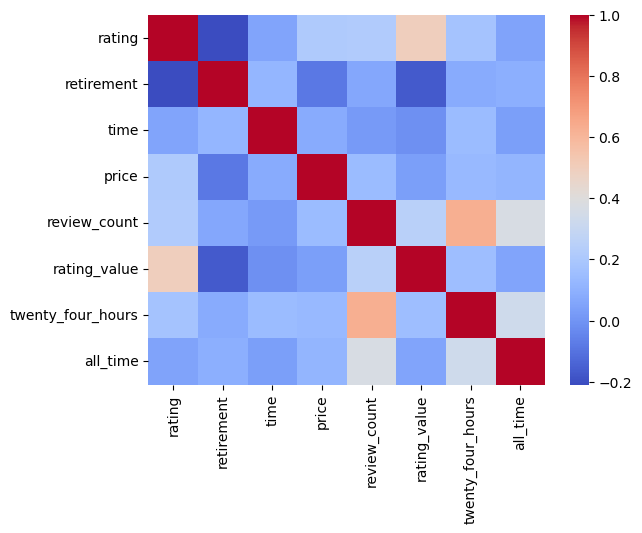

In [28]:
sns.heatmap(dfn.corr(),cmap="coolwarm")

### Prédiction du rating en fonction du genre, de la platforme, de la date de sortie et du prix.

In [2]:
import ast

def dummies_list(df):
    df2 = pd.get_dummies(pd.DataFrame(df.values.tolist()), prefix_sep='', prefix='')
    merged_columns = {}
    for col_name, col_data in df2.items():
        if col_name.strip() not in merged_columns:
            merged_columns[col_name.strip()] = col_data
        else:
            merged_columns[col_name.strip()] += col_data
    merged_platform = pd.DataFrame(merged_columns)
    return merged_platform

def X_with_dummies_genre_platform(X):
    X = X.dropna(axis="rows")
    X['platform'] = X['platform'].astype(str).apply(ast.literal_eval) # certaines listes sont enregistrées en str donc on remet tout en listes
    X['genre'] = X['genre'].astype(str).apply(ast.literal_eval)

    X_platform = dummies_list(X.platform)
    X_genre = dummies_list(X.genre)

    X[X_platform.columns] = X_platform
    X = X.drop(columns=["platform","genre"])

    #X = pd.merge(X,X_genre,how = "left",left_index=True,right_index=True)
    X = pd.merge(X,X_platform,how = "left",left_index=True,right_index=True)

    return X

In [78]:
X_with_dummies_genre_platform(df2[['platform', 'genre', 'date', 'price', "time"]])

,date,price,time,_x,Game Boy_x,PC_x,Amazon Luna_x,Amiga_x,Arcade_x,Browser_x,...,Xbox One_y,Oculus Go_y,PlayStation Now_y,Sega Mega Drive/Genesis_y,WonderSwan_y,Xbox Series X/S_y,PlayStation VR_y,Super Nintendo_y,NEC PC-98_y,TurboGrafx-CD_y
0,2012,4.5908,6.316667,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2007,9.1908,20.916667,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2011,4.5908,3.400000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1999,11.9508,7.166667,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2008,9.1908,6.500000,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,2017,0.5900,14.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2515,2017,0.0000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2516,2017,0.7900,4.166667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2517,2017,9.9900,2.383333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Preprocessing
df2 = df.drop(index=np.where(outliers==-1)[0])
print(len(outliers[outliers==1]))
print("iuefqgçfueb", len(df2.dropna(axis="rows")))
X = df2[['platform', 'genre', 'date', 'price', "time"]]
y = df2['rating']
X = X_with_dummies_genre_platform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = list(y_train)
y_test = list(y_test)


#model = LinearRegression()
model = Ridge()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


1958
iuefqgçfueb 1957
1958
1958


ValueError: Input X contains NaN.
Ridge does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [75]:
X_train

,date,price,time,Action,Action role-playing,Action-adventure,Adventure,Arcade_x,Arcade Shooter,Battle Arena,...,Xbox One,Oculus Go,PlayStation Now,Sega Mega Drive/Genesis,WonderSwan,Xbox Series X/S,PlayStation VR,Super Nintendo,NEC PC-98,TurboGrafx-CD
1784,2015,1.67,2.450000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2424,2016,4.77,24.233333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,2017,11.99,4.116667,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
755,2001,9.99,5.500000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
508,2003,0.00,15.000000,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,2015,1.06,16.116667,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1152,2017,19.50,9.033333,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1188,2015,9.75,2.516667,True,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1366,2010,6.59,93.033333,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


-> mauvais modele

### Prédiction du retirement en fonction du rating, de la plateforme, du genre, de la date et du prix

In [27]:
from sklearn.ensemble import RandomForestRegressor

# Preprocessing
X = df[['rating',"pourcentage_pos", 'platform', 'genre', 'date', 'price','time',"twenty_four_hours","all_time"]]
y = df['retirement']

X = X_with_dummies_genre_platform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict retirement on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')



Mean Squared Error: 15.78542409325397
R-squared: 0.5149765491771594


In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['platform', 'genre', 'rating']]
X = X_with_dummies_genre_platform(X)
#scaler = StandardScaler()  # Standardize numerical variables
#X_scaled = scaler.fit_transform(X_encoded)



c:\Users\rapha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\rapha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rapha\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


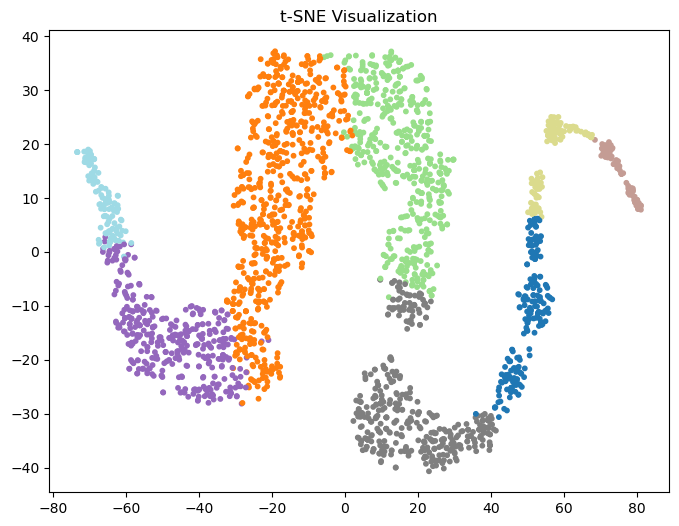

In [131]:
# t-SNE
from sklearn.manifold import TSNE

tab20 = plt.get_cmap('tab20')

km = KMeans(n_clusters=5)
km.n_clusters = 8
pred = km.fit_predict(X)

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=pred, cmap='tab20', s=10)
plt.title('t-SNE Visualization')
plt.show()